# Anopheles funestus assembly notebook

1. Yoann Aselmetti
2. Severine Berard
3. Eric Tannier
4. Cedric Chauve, Department of Mathematics, Simon Fraser University, cedric.chauve@sfu.ca

## Introduction

This notebook describes an improvement of the assembly of the genome of the mosquito *Anopheles funestus* using the newly developed methods DeClone and ADseq.

## Material and methods

**To do**

## Results

In [10]:
import sys
import math
%matplotlib inline  
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, './scripts')
from declone_aux import *

In [3]:
# Reading the genes file
GENES_import(read_tab_file("./data/anopheles_genes_filtered"))
OG_import(read_tab_file("./data/anopheles_genes_filtered"))
GENOMES_import(read_tab_file("./data/anopheles_genes_filtered"))
# Reading the BESST file
BESST_import(read_tab_file("./data/anopheles_besst"))
# Reading the DeClone results
DECLONE_import(read_tab_file("./results/anopheles_results_01_all"))

In [9]:
# Recording the score of all scaffolding adjacencies per species
adjacencies_scores_per_species={}  # List of adjacencies scores per species
for species_name in GENOMES_list():
    adjacencies_scores_per_species[species_name]=[]
adjacencies_scores_per_species["ANCESTRAL"]=[]
for instance in DECLONE_instances():
    for adjacency in DECLONE_adj_per_instance(instance):
        if DECLONE_adj_score(adjacency)<1.0:
            adjacencies_scores_per_species[DECLONE_adj_species_name(adjacency)].append(DECLONE_adj_score(adjacency))
       
adjacencies_nb_per_species={} # Number of scaffolding adjacencies per species
# Sorting the scores per species in increasing order
for species_name in GENOMES_list():
    adjacencies_nb_per_species[species_name]=len(adjacencies_scores_per_species[species_name])
    adjacencies_scores_per_species[species_name].sort()

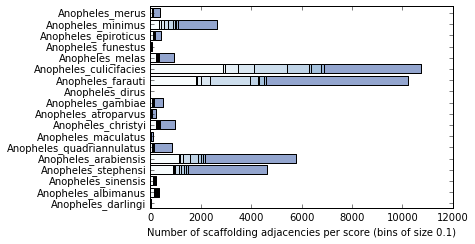

In [136]:
# Counting and plotting the number of adjacencies per score by bins of 1/step1
step1=10
ivalues=range(0,step1+1)
adjacencies_scores_per_species_distribution={}
for species_name in GENOMES_list():
    adjacencies_scores_per_species_distribution[species_name]={}
    for t in ivalues:
        adjacencies_scores_per_species_distribution[species_name][t]=0
    for s in adjacencies_scores_per_species[species_name]:
        adjacencies_scores_per_species_distribution[species_name][math.floor(s*step)]+=1

# Plotting as stacked bars
bars={}
bars[0]=[]
for species in GENOMES_list():
    bars[0].append(0)
for t in ivalues:
    bars[t+1]=[]
    for species in GENOMES_list():
        bars[t+1].append(adjacencies_scores_per_species_distribution[species][t])
 
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(ivalues)))
ind = np.arange(len(adjacencies_nb_per_species))
lft = sum([np.array(bars[0])])

#cell_text = []
for t in ivalues:
    plt.barh(ind, np.array(bars[t+1]), color=colors[t], left=lft)
    lft+=sum([np.array(bars[t+1])])
#    cell_text.append([x for x in bars[t+1]])

#plt.table(cellText=cell_text,rowLabels=ivalues,rowColours=colors,colLabels=GENOMES_list(),loc='bottom')
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.yticks(ind+height/2,  adjacencies_nb_per_species.keys())
plt.xlabel("Number of scaffolding adjacencies per score (bins of size "+str(1.0/step1)+")")
plt.show()

